In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

%cd 'gdrive/My Drive/licenta/car_model_od'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/licenta/car_model_od


In [2]:
!nvidia-smi

Thu Jun 18 11:20:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import argparse

from train import main

In [4]:
# !pip install numpy==1.17

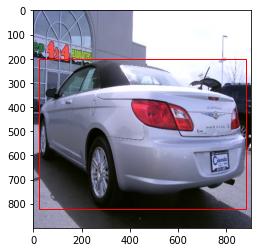

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Car only anchor
Multi anchors
FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Epoch: [0]  [   0/1123]  eta: 6:27:10  lr: 0.010000  loss: 1.4405 (1.4405)  loss_classifier: 0.6205 (0.6205)  loss_box_reg: 0.0465 (0.0465)  loss_objectness: 0.6983 (0.6983)  loss_rpn_box_reg: 0.0752 (0.0752)  time: 20.6861  data: 12.7498  max mem: 912
Epoch: [0]  [  10/1123]  eta: 0:38:49  lr: 0.010000  loss: 1.2453 (1.2501)  loss_classifier: 0.4097 (0.4468)  loss_box_reg: 0.0684 (0.1434)  loss_objectness: 0.6107 (0.5943)  loss_rpn_box_reg: 0.0703 (0.0656)  time: 2.0933  data: 1.1593  max mem: 1135
Epoch: [0]  [  20/1123]  eta: 0:22:05  lr: 0.010000  loss: 0.9786 (1.1003)  loss_classifier: 0.3363 (0.3928)  loss_box_reg: 0.2091 (0.1803)  loss_objectness: 0.4121 (0.4433)  loss_rpn_box_reg: 0.0736 (0.0839)  time: 0.2274  data: 0.0004  max mem: 1135
Epoch: [0]  [  30/1123]  eta: 0:17:00  lr: 0.010000  loss: 0.7383 (0.9657)  loss_classifier: 0.2573 (0.3406)  loss_box_reg: 0.1958 (0.1751)  loss_objectness: 0.1635 (0.3447)  loss_rpn_box_reg: 0.1187 (0.1052)  time: 0.2959  data: 0.0003  max m

In [5]:
parser = argparse.ArgumentParser(description='Training and finetuning script for Car Model Detection')

parser.add_argument('--dataset-type', default='VOC', type=str, choices=['VOC','COCO'],
                    help='VOC or COCO format')
# training arg
parser.add_argument('--batch-size', default=32, type=int,
                    help='training batch size (default: 32)')
parser.add_argument('--epochs', default=40, type=int,
                    help='training epochs (default: 40)')
parser.add_argument('--print-freq', default=10, type=int,
                    help='print frequency (default: 10)')
parser.add_argument('--arch', default='vgg19_bn', choices=['resnext50',
                                                            'resnet18',
                                                            'resnet50',
                                                            'mobilenetv2',
                                                            'vgg19_bn',
                                                            'resnet50_fpn'],
                    help='Architecture (default: vgg19_bn)')
parser.add_argument('--imgsize', default=224, type=int,
                    help='Input image size')
parser.add_argument('--version', default=1, type=int, choices=[1],
                    help='Classification version (default: 1)\n'
                          '1. Cars Model only\n')
parser.add_argument('--finetune', default=False, action='store_true',
                    help='whether to finetune from 400x400 to 224x224 (default: False)')
parser.add_argument('--feature-extract', default=False, action='store_true',
                    help='whether to feature extract (default: False)')
parser.add_argument('--path', default=None,
                    help='required if it is a finetune task (default: None)')
parser.add_argument('--train-only-car', default=False, action='store_true',
                    help='whether to train model car or only car')
parser.add_argument('--multi-anchors', default=False, action='store_true',
                    help='whether to add more anchors')

# optimizer arg
parser.add_argument('--optim', default='SGD', type=str,
                        help='Optimizer (default: SGD)')
parser.add_argument('--lr', default=0.01, type=float,
                    help='SGD learning rate (default: 0.01)')
parser.add_argument('--weight-decay', default=0.0001, type=float,
                    help='SGD weight decay (default: 0.0001)')
parser.add_argument('--momentum', default=0.9, type=float,
                    help='SGD momentum (default: 0.9)')

# args = parser.parse_args()

args = parser.parse_args(args=['--arch', 'resnet18', '--batch-size', '8', '--epochs', '10', '--optim', 'sgd', '--lr', '0.01', '--imgsize', '900',
                               '--weight-decay', '1e-4', '--print-freq', '10', '--dataset-type', 'VOC',
                              #  '--finetune', '--path', 'logs/resnet18_900_20/1/best.pth',
                               '--train-only-car', '--feature-extract',
                               '--multi-anchors'])

if args.finetune and args.path is None:
    parser.error('--finetune requires --path')

PATH_to_log_dir = main(args)

In [6]:
# # Start tensorboard.
# %reload_ext tensorboard
# %tensorboard --logdir PATH_to_log_dir